Extracting Dataset using Kaggle API

In [23]:
# install Kaggle library
! pip install -q kaggle

In [24]:
# # configuring the path of Kaggle.json file
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [25]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats
# downloads the data in a ZIP file

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
!ls

dogs-vs-cats.zip  resized_images  sampleSubmission.csv	train
kaggle.json	  sample_data	  test1.zip		train.zip


In [27]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip: # reads the dataset as a ZIP file
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [28]:
# extracting the compressed train dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip: # reads the dataset as a ZIP file
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [29]:
import os
#  counting the number of files in train folder
path, directories, files = next(os.walk("/content/train"))
file_count = len(files) # gives the no. of flies in the given directory
print('Number of images: ', file_count)

Number of images:  25000


In [30]:
# Since we are using a Pre-trained model, we wont be using all the 25000 images. We will only use a subsample of these images

Printing the name of images

In [31]:
file_names = os.listdir('/content/train/') # creates a python of the all the files in our directory
print(file_names)

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg', 'cat.3877.jpg', 'cat.6013.jpg', 'cat.12459.jpg', 'dog.5586.jpg', 'cat.10732.jpg', 'dog.11877.jpg', 'dog.7902.jpg', 'cat.7195.jpg', 'dog.3587.jpg', 'cat.8508.jpg', 'dog.7225.jpg', 'cat.6285.jpg', 'dog.9900.jpg', 'cat.10723.jpg', 'dog.5987.jpg', 'dog.10149.jpg', 'dog.6532.jpg', 'dog.3443.jpg', 'cat.7340.jpg', 'cat.6676.jpg', 'dog.8255.jpg', 'cat.2762.jpg', 'cat.9537.jpg', 'cat.7171.jpg', 'dog.2052.jpg', 'cat.8372.jpg', 'dog.5048.jpg', 'dog.348.jpg', 'dog.10321.jpg', 'cat.4359.jpg', 'cat.11647.jpg', 'dog.9213.jpg', 'cat.10426.jpg', 'dog.578.jpg', 'dog.1443.jpg', 'dog.2158.jpg', 'cat.1978.jpg', 'dog.1382.jpg', 'cat.5677.jpg', 'cat.9560.jpg', 'cat.11292.jpg', 'dog.5755.jpg', 'dog.6156.jpg', 'cat.9868.jpg', 'cat.5990.jpg', 'dog.12005.jpg', 'dog.3158.jpg', 'cat.9480.jpg', 'cat.11424.jpg', 'cat.9401.jpg', 'dog.272.jpg', 'dog.566.jpg', 'cat.2474.jpg', 'dog.8223.jpg', 'cat.5714.jpg', 'dog.7889.jpg', 'cat.11190.jpg', 

In [32]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print('Class:', name[0:3])  # Prints the first 3 letters of the file names, which is nothing but the class of that image in this case

Class: cat
Class: cat
Class: cat
Class: dog
Class: cat


In [33]:
# Finding the number of dog and cat images
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for name in file_names:

  Class = name[0:3]  # Slices first 3 letter of the file name and assigns it to the variable 'Class'

  if Class == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [34]:
# Usually the images of different classes are present in seperate folders
# But in this case, both classes (cats and dogs) are present in the same folder
# So we have to seperate them

Importing the Dependencies

In [35]:
import numpy as np
from PIL import Image  # Pillow (PIL) is a library used a lot in Image processing tasks
import matplotlib.pyplot as plt  # For displaying images
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow  # imshow function in the cv2 library (OpenCV library) does not work in Google Colab environment, so cn2_imshow is an alternative in google colab, for displaying images

Displaying the images of dogs and cats

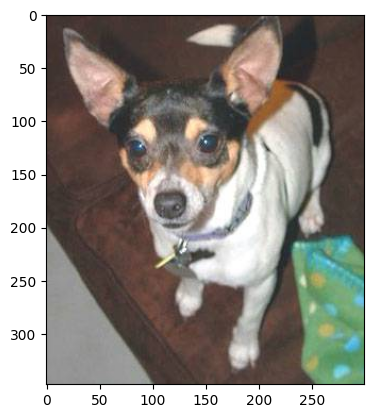

In [36]:
# display dog image
img = mpimg.imread('/content/train/dog.7247.jpg') # imread reads an image from a file into an array
imgplot = plt.imshow(img)
plt.show()

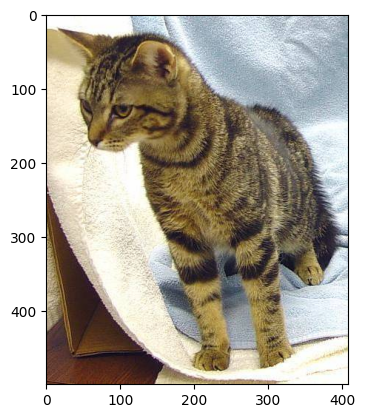

In [37]:
# display cat image
img = mpimg.imread('/content/train/cat.4624.jpg')  # imread reads an image from a file into an array
imgplot = plt.imshow(img)
plt.show()

In [38]:
# We can notice that all the images are of different shapes and sizes (different no. of pixels)
# But, while training a model, all images have to be of same sizes
# The model we are using (MobileNet V2), requires all the images to be of the size 224 x 224 pixels
# So we have to do resizing of our images
## We can also convert our RGB colour images into greyscale images, which are smaller in size, so training  will happen faster. In this case, we will continue with RGB images itself

Resizing all the images

In [39]:
# We can directly resize these images, store it in some numpy arrays, and train our model from that
# In this case, we will create a different directory, resize all these images and save those images there. Because we want a copy of the original images as well as the resized images

In [40]:
# Creating a directory for resized images

# Check if the directory exists
if not os.path.exists('/content/resized_images'):
    # Create the directory
    os.mkdir('/content/resized_images') # mkdir means make directory


In [41]:
# Since we are doing Transfer Learning, we can reduce the number of training images and use only a subsample of the total images

original_folder = '/content/train/'
resized_folder = '/content/resized_images/'

for i in range(2000):  # We will take only first 2000 images out of 25000 images for training

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename  # concatenates the original_folder path and the filenames, and creates paths for the 2000  original images

  img = Image.open(img_path)  # PIL.Image opens our image using the image path
  img = img.resize((224, 224))
  img = img.convert('RGB')  # tells that it is a colour image (mandatory)

  new_img_path = resized_folder+filename
  img.save(new_img_path)

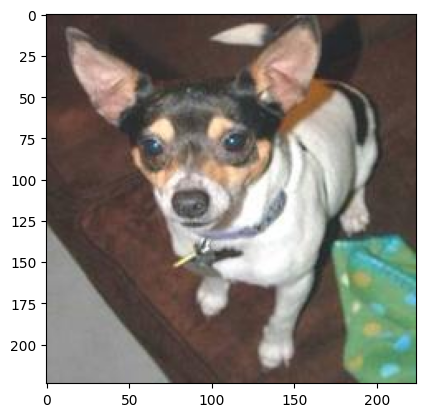

In [42]:
# display resized dog image
img = mpimg.imread('/content/resized_images/dog.7247.jpg')  # imread reads an image from a file into an array
imgplot = plt.imshow(img)
plt.show()

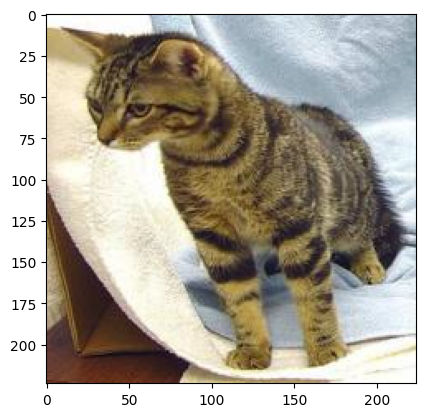

In [43]:
# display resized cat image
img = mpimg.imread('/content/resized_images/cat.4624.jpg')  # imread reads an image from a file into an array
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats



Cat --> 0

Dog --> 1

In [44]:
# creaing a for loop to assign labels
resized_file_names = os.listdir('/content/resized_images/')


labels = []

for i in range(2000):

  name = resized_file_names[i]
  label = name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [45]:
print(resized_file_names[0:5])
print(len(resized_file_names))

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg']
2000


In [46]:
# Printing the labels
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [47]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


In [48]:
# We can see that we have almost equal number of cat and dog images. So dataset is balanced
# Had the dataset been unbalanced, we would have to build the 'for loop' for selecting 2000 images such that dog and cat images are equal.

Converting all the resized images to numpy arrays

In [49]:
import cv2  # OpenCV library
import glob

In [50]:
image_directory = '/content/resized_images/'  # this directory contains 2000 resized images
image_extension = ['png', 'jpg']  # so as to include both type of extensions

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
# 'glob.glob' basically locates the file
# Also, the 'for loop' iterates over both png and jpg

dog_cat_images = np.asarray([cv2.imread(file) for file in files])
# OpenCV library's 'cv2.imread' reads each image file in the list 'files', and converts each into a numpy array
# All these numpy arrays corresponding to each image will be stored in a single array, which we are calling 'dog_cat_images'

In [51]:
print(dog_cat_images) # Each image array has 3 columns correponding to 3 channels R,G,B

[[[[250 253 255]
   [250 253 255]
   [250 253 255]
   ...
   [196 186 169]
   [189 179 162]
   [178 168 151]]

  [[252 253 255]
   [252 253 255]
   [252 253 255]
   ...
   [183 173 156]
   [186 176 159]
   [187 177 160]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [183 173 156]
   [187 177 160]
   [191 181 164]]

  ...

  [[ 59  75 122]
   [ 58  74 121]
   [ 55  71 118]
   ...
   [252 254 254]
   [251 253 253]
   [251 253 253]]

  [[ 22  37  86]
   [ 22  37  86]
   [ 24  39  88]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]

  [[ 45  60 109]
   [ 41  56 105]
   [ 38  53 102]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]]


 [[[198 219 220]
   [191 212 213]
   [189 211 209]
   ...
   [187 195 195]
   [187 194 197]
   [187 194 197]]

  [[194 216 214]
   [189 211 209]
   [189 211 209]
   ...
   [187 194 197]
   [187 194 197]
   [187 194 197]]

  [[192 213 210]
   [189 210 207]
   [191 212 209]
   ...
   [188 194 199]
   [187 193 198]
   [187 193

In [52]:
print(len(dog_cat_images))
print(type(dog_cat_images))
print(dog_cat_images.shape)  # 2000 images, 224 x 224 pixels, 3 channels

2000
<class 'numpy.ndarray'>
(2000, 224, 224, 3)


In [53]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [55]:
print(X.shape, X_train.shape, X_test.shape)  # 1600 --> training images, 400 --> test images

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [56]:
# All the pixel values are b/w 0 (pure black) to 255 (pure white)
# We want to the scale the pixel values b/w 0 and 1

# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [57]:
print(X_train_scaled)

[[[[0.51764706 0.5254902  0.5254902 ]
   [0.51764706 0.5254902  0.5254902 ]
   [0.51764706 0.5254902  0.5254902 ]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  [[0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  [[0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  ...

  [[0.25098039 0.22745098 0.41176471]
   [0.24705882 0.23529412 0.41568627]
   [0.25098039 0.23921569 0.41960784]
   ...
   [0.39215686 0.36862745 0.41176471]
   [0.4        0.36862745 0.41176471]
   [0.33333333 0.30980392 0.35294118]]

  [[0.24313725 0.21568627 0.43921569]
   [0.2

Building the Neural Network

In [58]:
import tensorflow as tf
import tensorflow_hub as hub  # To get the pre-trained model from tensorflow_hub library

In [59]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'  # url

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)  # This downloads the model, weights, etc

In [60]:
num_of_classes = 2  # Number of classes of our images

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model.

model = tf.keras.Sequential([

    pretrained_model,                       # This will provide the overall architecture along with the weights
    tf.keras.layers.Dense(num_of_classes)   # This will be our last output layer defined by us

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [61]:
model.compile(                                                              # Here, we mention the loss fn, optimizer, etc we want to use. Configures the model for training.
    optimizer = 'adam',                                                     # 'adam' is default (most widely used) optimizer
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Used when labels are label-encoded. Use CategoricalCrossentropy when labels are One-Hot encoded
    metrics = ['acc']                                                       # Metric = Accuracy
)

In [62]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.1902 - acc: 0.9300
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0596 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 59s 1s/step - loss: 0.0414 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 72s 1s/step - loss: 0.0330 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 53s 1s/step - loss: 0.0236 - acc: 0.9944


In [63]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 13s 888ms/step - loss: 0.0611 - acc: 0.9800
Test Loss = 0.06108598783612251
Test Accuracy = 0.9800000190734863


In [64]:
# train_accuracy = []
# test_accuracy = []

# epochs = 5  # Number of epochs

# for epoch in range(1, epochs + 1):
#     # Train the model for one epoch
#     model.fit(X_train_scaled, Y_train, epochs=1, verbose=0)

#     # Evaluate the model on training data
#     train_loss, train_acc = model.evaluate(X_train_scaled, Y_train, verbose=0)
#     train_accuracy.append(train_acc)

#     # Evaluate the model on test data
#     test_loss, test_acc = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     test_accuracy.append(test_acc)

#     # Print progress
#     print(f"Epoch {epoch}/{epochs} - Train Accuracy: {train_acc:.4f} - Test Accuracy: {test_acc:.4f}")

# # Plot train and test accuracy
# plt.plot(range(1, epochs + 1), train_accuracy, label='Train Accuracy')
# plt.plot(range(1, epochs + 1), test_accuracy, label='Test Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Train and Test Accuracy as a Function of Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()

Building a Predictive System

Path of the image to be predicted: /content/dog.jpg


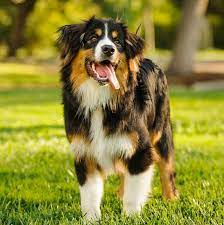

1/1 [==============================] - 1s 628ms/step
[[-3.4954453  2.0241108]]
1
The image represents a Dog


In [65]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)  # cv2.imread reads and converts the image into a numpy array

cv2_imshow(input_image)  # cv2.imshow does not exist in Google colab So we use cv2_imshow

input_image_resize = cv2.resize(input_image, (224,224))  # Resizing

input_image_scaled = input_image_resize/255  # Scaling

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])  # Reshapin. It is to tell the model that we are only predicting for one image

input_prediction = model.predict(image_reshaped)  # Gives probabilitie for the two classes

print(input_prediction)  # Sum of all probabilities = 1

input_pred_label = np.argmax(input_prediction)  # argmax returns the index/label of the class having the maximum prob. value

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


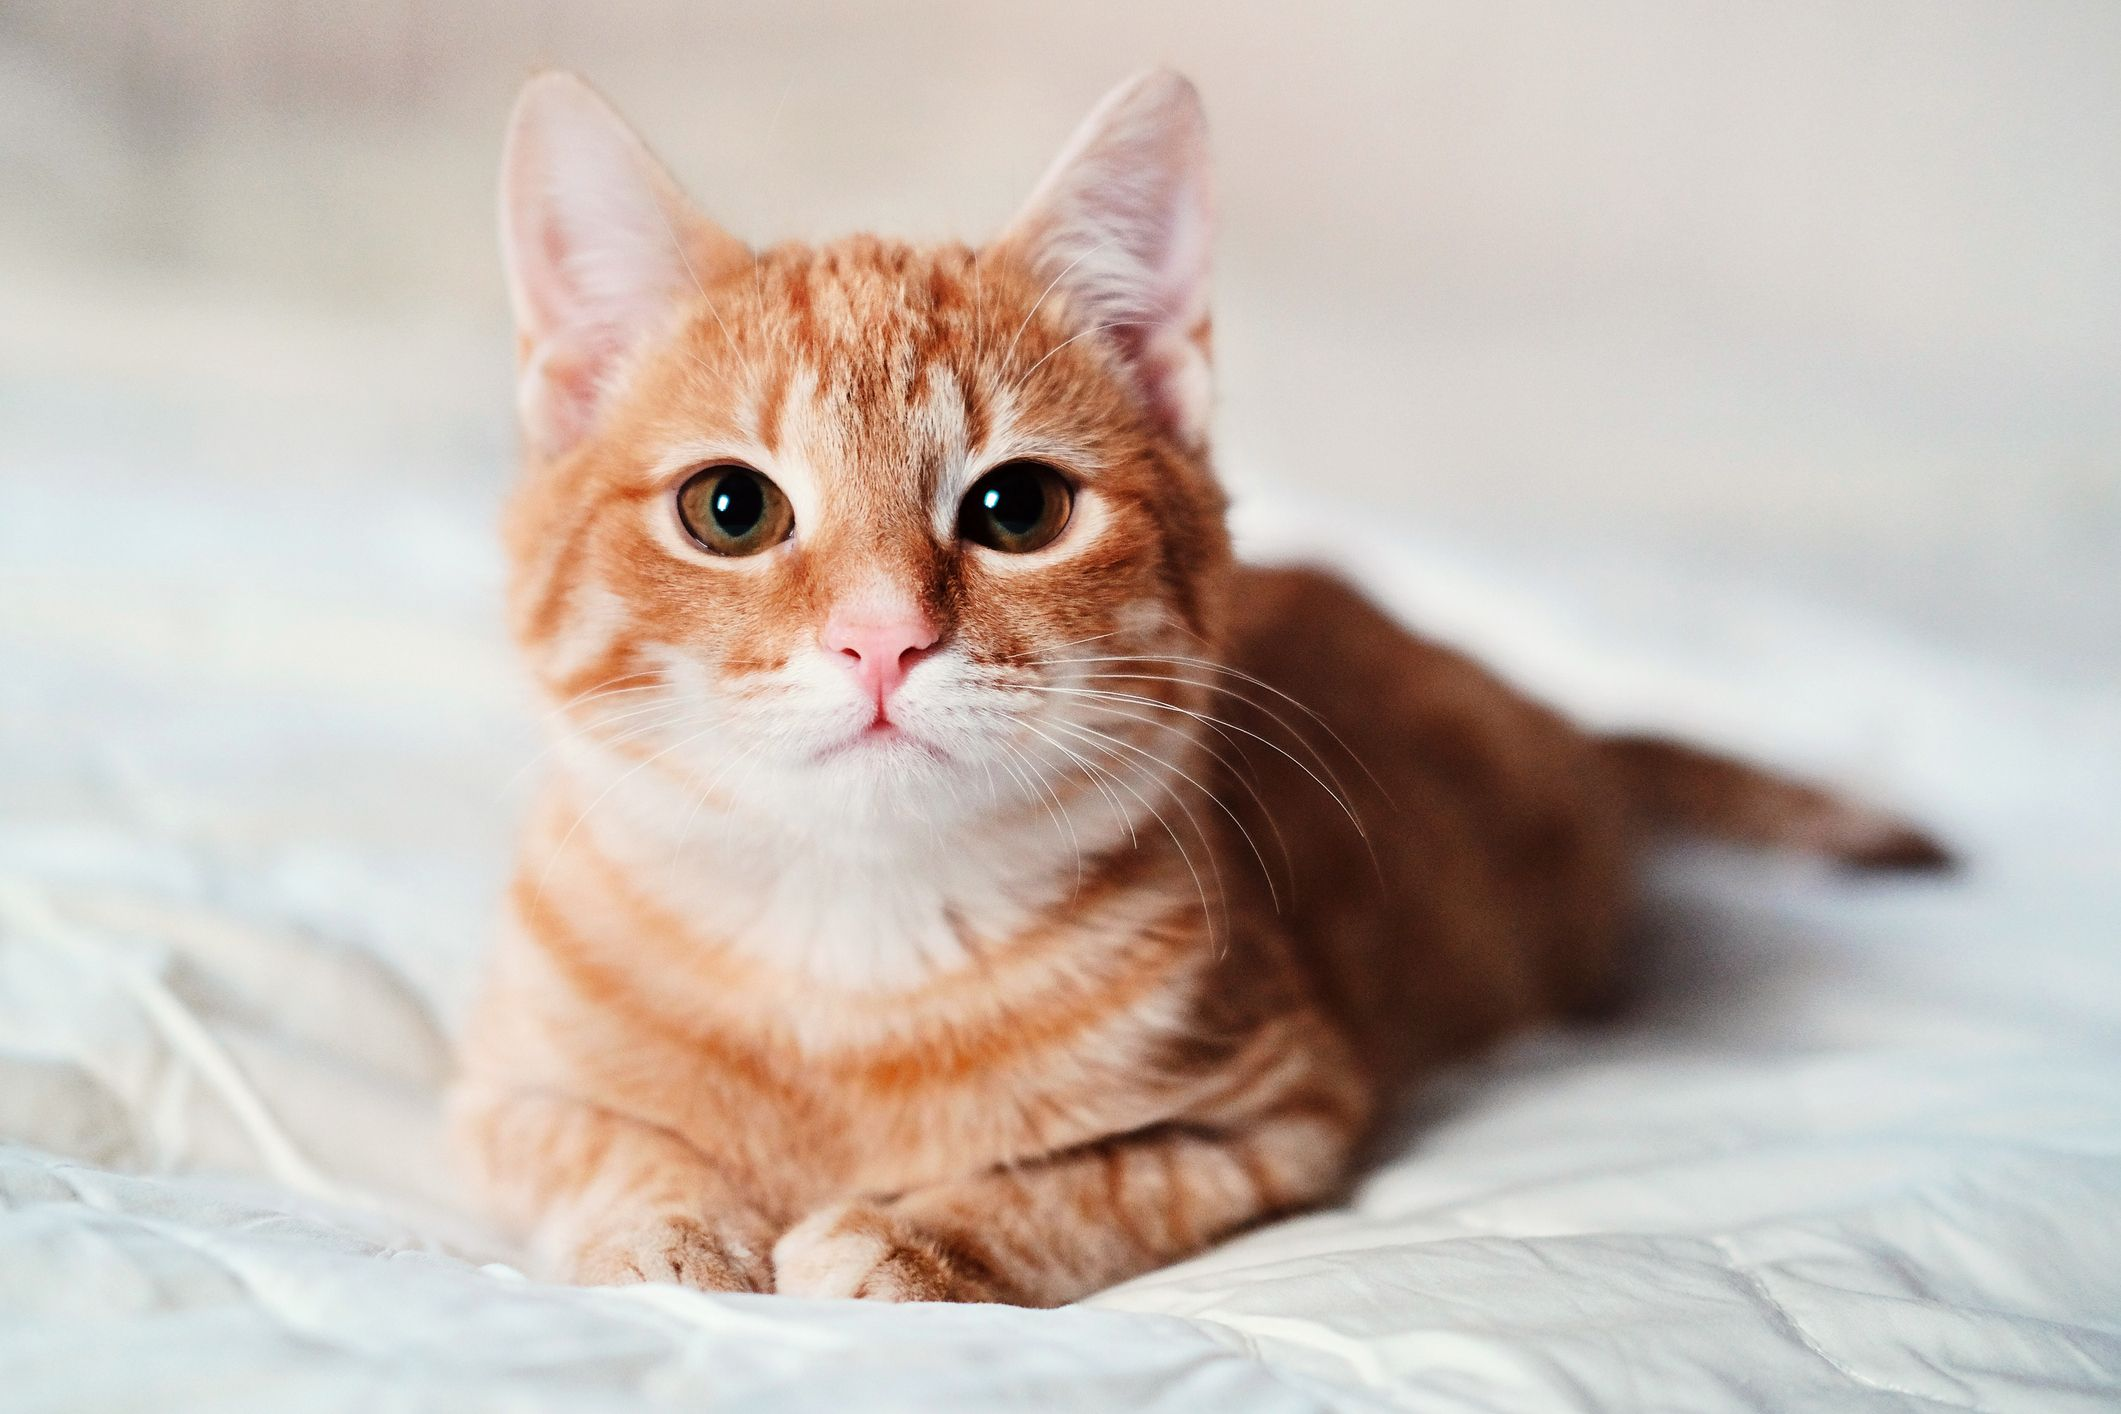

1/1 [==============================] - 0s 88ms/step
[[ 5.027928  -3.8553944]]
0
The image represents a Cat


In [66]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')